In [1]:
# Import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('MysteryData/Mystery4.data', header=None)

# Picture 4

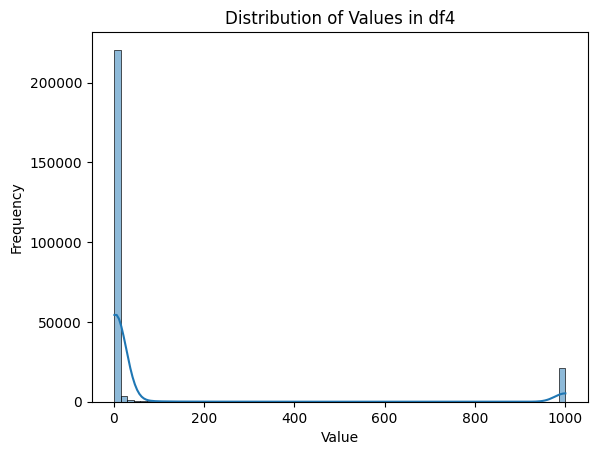

In [3]:
# pic 4
# Flatten the DataFrame to 1D if it's multi-dimensional (to avoid complications)
df_flat = df.values.flatten()

# Plot histogram using seaborn
sns.histplot(df_flat, bins=70, kde=True)  # kde=True adds a smooth curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in df4')
plt.show()

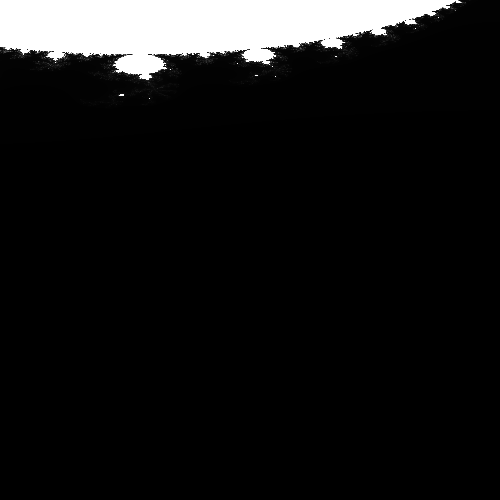

In [4]:
# pic 4


import numpy as np
from PIL import Image

# Load the .data file with comma as the delimiter
data = np.loadtxt('MysteryData/Mystery4.data', delimiter=',')  # Specify the delimiter

# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = df_flat.min()
max_val = df_flat.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image4.png')
display(image)

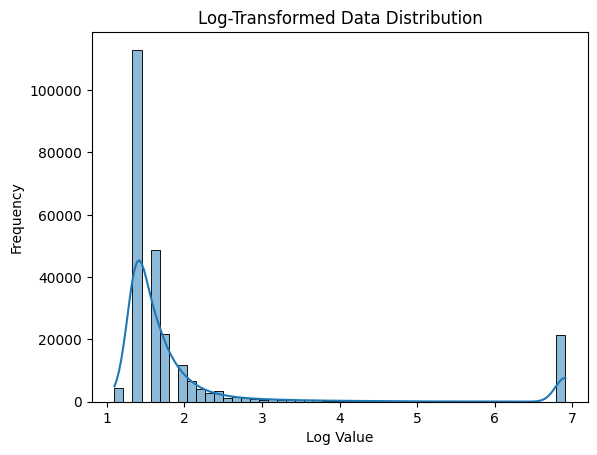

In [5]:
# pic 4

import numpy as np
from PIL import Image

# Load the .data file with comma as the delimiter
data = np.loadtxt('MysteryData/Mystery4.data', delimiter=',')  # Specify the delimiter

# Apply log transformation (add small constant to avoid log(0))
log_transformed_data = np.log1p(df_flat)  # log1p(x) = log(1 + x) to handle zeros

# Plot histogram of log-transformed data
sns.histplot(log_transformed_data.flatten(), bins=50, kde=True)
plt.title('Log-Transformed Data Distribution')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


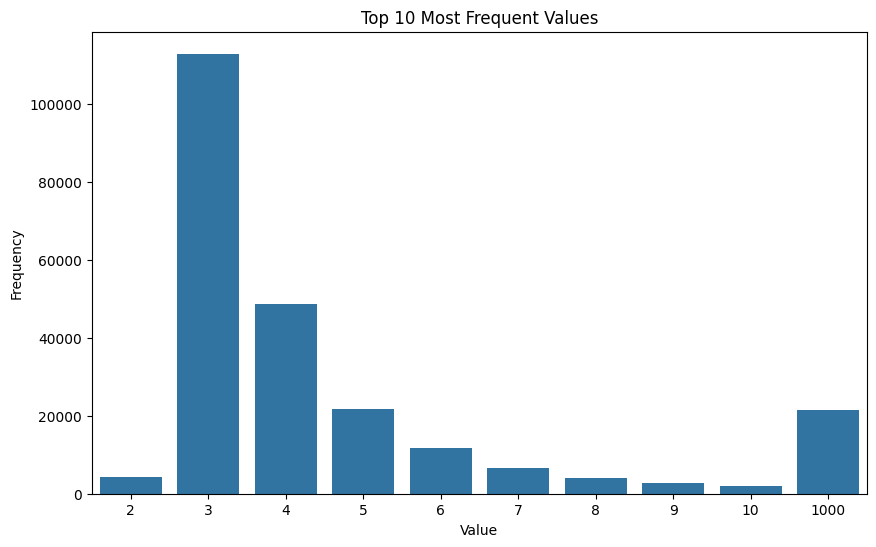

In [6]:
# pic 4 - show top 10 most frequent value
# Count the frequency of each unique value
value_counts = pd.Series(df_flat).value_counts()

# Select the top 10 most frequent values (you can adjust the number)
top_values = value_counts.head(10)

# Plot the top 10 most frequent values
plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.index, y=top_values.values)
plt.title('Top 10 Most Frequent Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

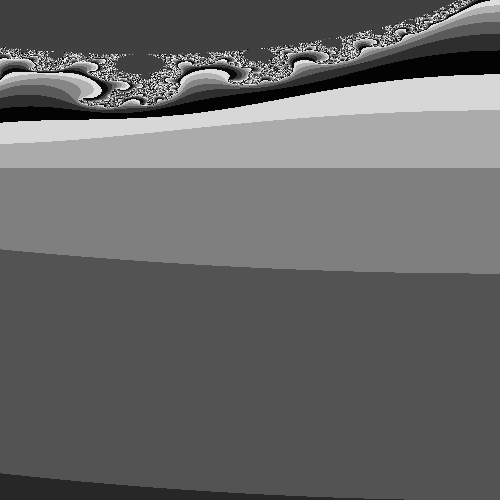

In [7]:
# pic 4
# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = log_transformed_data.min()
max_val = log_transformed_data.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image4_log.png')
display(image)

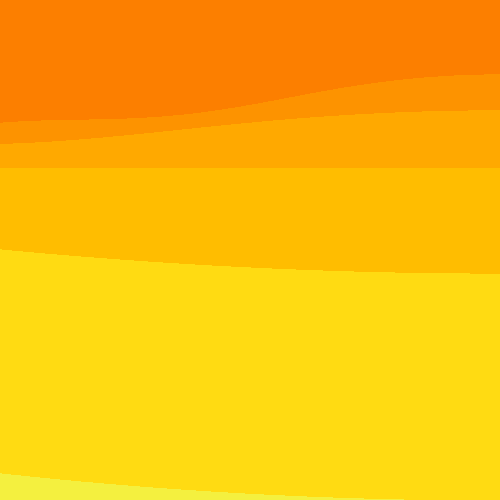

In [8]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('Wistia')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output4_color1.png')
display(image)

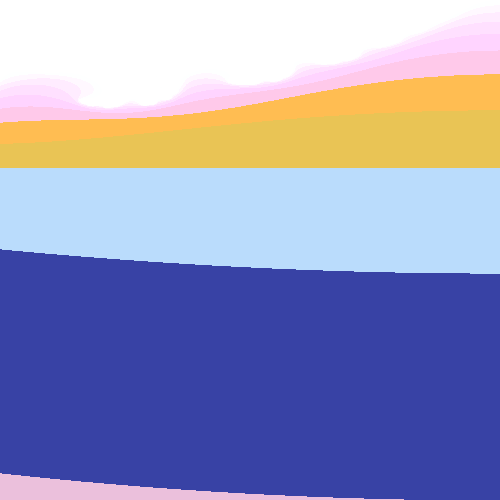

In [9]:
import numpy as np
from PIL import Image
from IPython.display import display

# Define custom color mapping with shades
color_mapping = {
    'section1_start': (205, 180, 219),    # purple
    'section1_end': (255, 200, 221),          # pink
    
    'section2_start': (0, 0, 128),        # Dark blue
    'section2_end': (189, 224, 254),        # blue
    
    'section3_start': (189, 224, 254),        # blue
    'section3_end': (255, 183, 3),        # yellow
    
    'section4_start': (255, 183, 3),      # yellow
    'section4_end': (255, 200, 221),          # pink
}

# Define the function to map grayscale values to these colors
def grayscale_to_rgb(value):
    if value < 64:  # Section 1
        factor = value / 64
        color1 = color_mapping['section1_start']
        color2 = color_mapping['section1_end']
    elif value < 128:  # Section 2
        factor = (value - 64) / 64
        color1 = color_mapping['section2_start']
        color2 = color_mapping['section2_end']
    elif value < 192:  # Section 3
        factor = (value - 128) / 64
        color1 = color_mapping['section3_start']
        color2 = color_mapping['section3_end']
    else:  # Section 4
        factor = (value - 192) / 63
        color1 = color_mapping['section4_start']
        color2 = color_mapping['section4_end']  
        
    red = int(color1[0] * (1 - factor) + color2[0] * factor)
    green = int(color1[1] * (1 - factor) + color2[1] * factor)
    blue = int(color1[2] * (1 - factor) + color2[2] * factor)

    # Clamp values to the range 0-255
    red = max(0, min(255, red))
    green = max(0, min(255, green))
    blue = max(0, min(255, blue))
    
    
    return (red, green, blue)



# Apply color mapping
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data], dtype=np.uint8)

# Convert to an image
image = Image.fromarray(rgb_data)

# Save the image
image_path = 'output4_custom1.png'
image.save(image_path)

# Display the image
display(image)


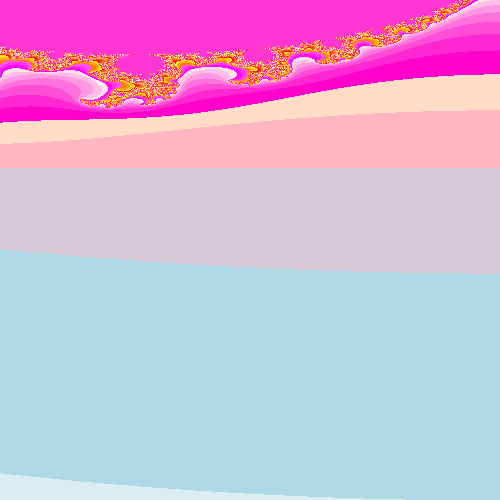

In [10]:
# Aiming to get rid of the yellowisg=h green in the middle
# Step 1: Define your custom pastel color mapping function with a lighter, pleasant mid-tone
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a light pastel blue (173, 216, 230)
        # Interpolating between white (255,255,255) and light blue (173, 216, 230)
        red = int(255 - (82 * (value / 85)))  # Decrease red from 255 to 173
        green = int(255 - (39 * (value / 85)))  # Decrease green from 255 to 216
        blue = int(255 - (25 * (value / 85)))  # Decrease blue from 255 to 230
    elif value < 170:  # Mid-range values map to a light pastel coral (255, 182, 193)
        # Interpolating between light blue (173, 216, 230) and coral (255, 182, 193)
        red = int(173 + (82 * ((value - 85) / 85)))  # Increase red from 173 to 255
        green = int(216 - (34 * ((value - 85) / 85)))  # Decrease green from 216 to 182
        blue = int(230 - (37 * ((value - 85) / 85)))  # Decrease blue from 230 to 193
    else:  # High values map to pastel yellow (255, 255, 204)
        # Interpolating between coral (255, 182, 193) and pastel yellow (255, 255, 204)
        red = int(255)  # Stay at 255 for red
        green = int(182 + (73 * ((value - 170) / 85)))  # Increase green from 182 to 255
        blue = int(193 + (11 * ((value - 170) / 85)))  # Slightly increase blue from 193 to 204
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output4_custom2.png')
display(image)


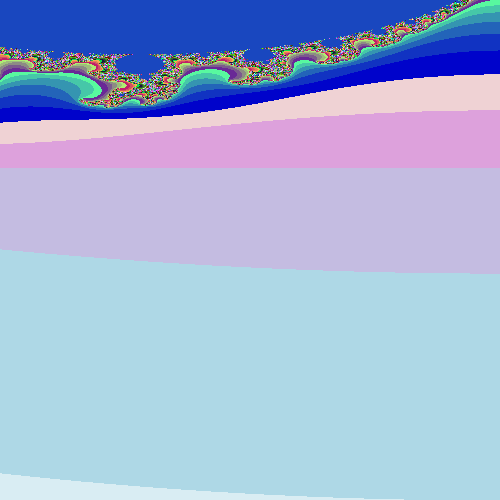

In [11]:
# Step 1: Define your custom pastel color mapping function with softer tones
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a light pastel blue (173, 216, 230)
        # Interpolating between white (255,255,255) and light blue (173, 216, 230)
        red = int(255 - (82 * (value / 85)))  # Decrease red from 255 to 173
        green = int(255 - (39 * (value / 85)))  # Decrease green from 255 to 216
        blue = int(255 - (25 * (value / 85)))  # Decrease blue from 255 to 230
    elif value < 170:  # Mid-range values map to a pastel lavender (221, 160, 221)
        # Interpolating between light blue (173, 216, 230) and lavender (221, 160, 221)
        red = int(173 + (48 * ((value - 85) / 85)))  # Increase red from 173 to 221
        green = int(216 - (56 * ((value - 85) / 85)))  # Decrease green from 216 to 160
        blue = int(230 - (9 * ((value - 85) / 85)))  # Decrease blue from 230 to 221
    else:  # High values map to pastel yellow (255, 255, 204)
        # Interpolating between lavender (221, 160, 221) and pastel yellow (255, 255, 204)
        red = int(221 + (34 * ((value - 170) / 85)))  # Increase red from 221 to 255
        green = int(160 + (95 * ((value - 170) / 85)))  # Increase green from 160 to 255
        blue = int(221 - (17 * ((value - 170) / 85)))  # Decrease blue from 221 to 204
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output4_custom3.png')
display(image)


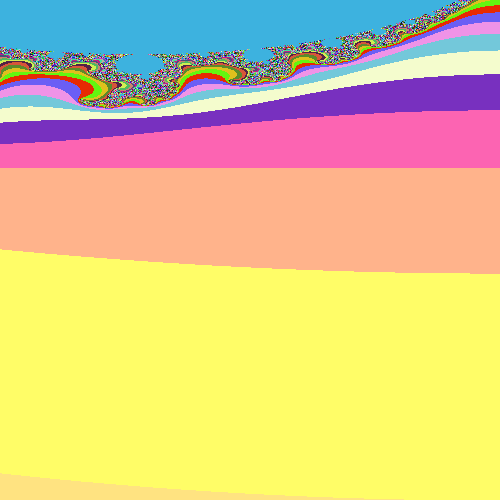

In [12]:
# Define a sunset-themed color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to light peach to soft yellow
        # Interpolating between peach (255, 204, 153) and soft yellow (255, 255, 102)
        red = int(255)  # Constant red (255)
        green = int(204 + (51 * (value / 85)))  # Increase green from 204 to 255
        blue = int(153 - (51 * (value / 85)))  # Decrease blue from 153 to 102
    elif value < 170:  # Mid values map to yellow-orange to pink
        # Interpolating between soft yellow (255, 255, 102) and pink (255, 102, 178)
        red = int(255)  # Constant red (255)
        green = int(255 - (153 * ((value - 85) / 85)))  # Decrease green from 255 to 102
        blue = int(102 + (76 * ((value - 85) / 85)))  # Increase blue from 102 to 178
    else:  # High values map to deep red to purple and deep blue
        # Interpolating between pink (255, 102, 178) and deep blue (0, 0, 102)
        red = int(255 - (255 * ((value - 170) / 85)))  # Decrease red from 255 to 0
        green = int(102 - (102 * ((value - 170) / 85)))  # Decrease green from 102 to 0
        blue = int(178 - (76 * ((value - 170) / 85)) + (102 * ((value - 170) / 85)))  # Transition blue to 102
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output4_custom4.png')
display(image)


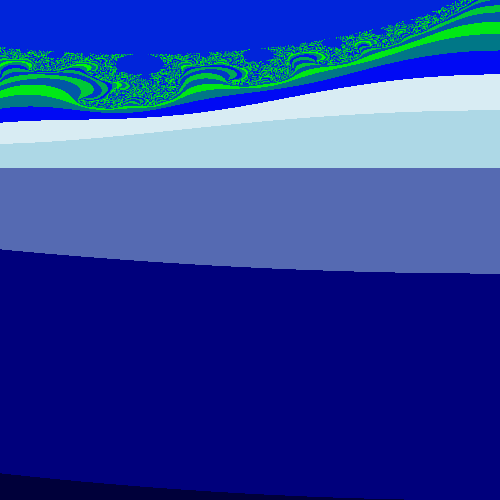

In [13]:
# Define a ocean-themed color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to black to dark blue
        # Interpolating between black (0, 0, 0) and dark blue (0, 0, 128)
        red = int(0)
        green = int(0)
        blue = int(128 * (value / 85))  # Gradually increase blue from 0 to 128
    elif value < 170:  # Mid-range values map to dark blue to light blue
        # Interpolating between dark blue (0, 0, 128) and light blue (173, 216, 230)
        red = int(0 + (173 * ((value - 85) / 85)))  # Increase red from 0 to 173
        green = int(0 + (216 * ((value - 85) / 85)))  # Increase green from 0 to 216
        blue = int(128 + (102 * ((value - 85) / 85)))  # Increase blue from 128 to 230
    elif value < 255:  # High values map to light blue to white or super light blue
        # Interpolating between light blue (173, 216, 230) and white/silver (255, 255, 255)
        red = int(173 + (82 * ((value - 170) / 85)))  # Increase red from 173 to 255
        green = int(216 + (39 * ((value - 170) / 85)))  # Increase green from 216 to 255
        blue = int(230 + (25 * ((value - 170) / 85)))  # Increase blue from 230 to 255
    else:  # Special case for some bluish-green ripples (optional scatter)
        red = int(0)
        green = int(255 * ((value - 255) / 100))  # Add a hint of green
        blue = int(255 * (1 - ((value - 255) / 100)))  # Slightly decrease blue
    return (red, green, blue)


# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output4_custom5.png')
display(image)


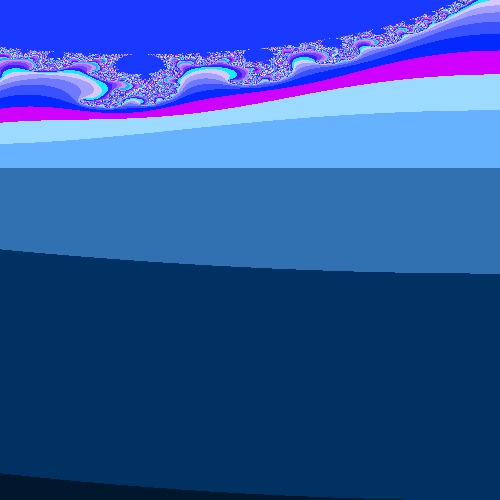

In [14]:
# Define the updated ocean color mapping
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a deep ocean blue (0, 51, 102)
        # Interpolating between black (0, 0, 0) and deep ocean blue (0, 51, 102)
        red = int(0 * (1 - value / 85))
        green = int(51 * (value / 85))
        blue = int(102 * (value / 85))
    elif value < 170:  # Mid-range values map to softer sea blue (102, 178, 255)
        # Interpolating between deep ocean blue (0, 51, 102) and sea blue (102, 178, 255)
        red = int(102 * ((value - 85) / 85))
        green = int(51 + (127 * ((value - 85) / 85)))  # From 51 to 178
        blue = int(102 + (153 * ((value - 85) / 85)))  # From 102 to 255
    else:  # High values map to soft sky blue with white highlights (204, 255, 255)
        # Interpolating between sea blue (102, 178, 255) and light sky blue (204, 255, 255)
        red = int(102 + (102 * ((value - 170) / 85)))  # From 102 to 204
        green = int(178 + (77 * ((value - 170) / 85)))  # From 178 to 255
        blue = int(255)  # Stay at 255 for blue (light sky blue)
    return (red, green, blue)

# Apply the mapping to your dataset as before:
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output4_custom6.png')
display(image)
